In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
%matplotlib inline
import math

In [42]:
train = pd.read_csv('train.csv')

In [43]:
test = pd.read_csv('test.csv')

In [44]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [46]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

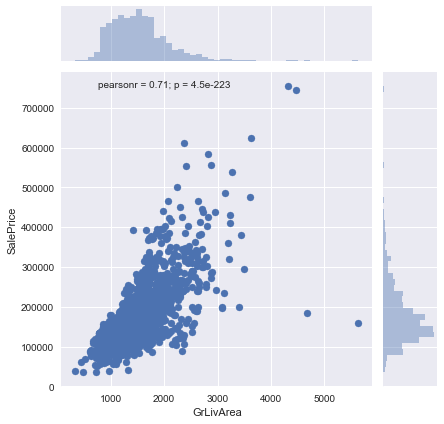

In [47]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=train)

From the descriptive thing:
    "There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately)."

In [48]:
# outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

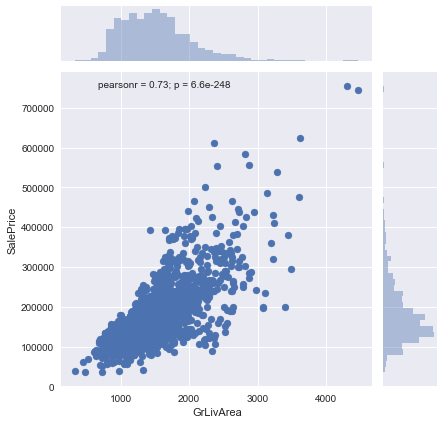

In [49]:
#replotting
sns.jointplot(x ="GrLivArea", y="SalePrice", data=train)

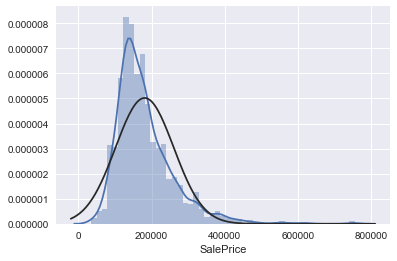

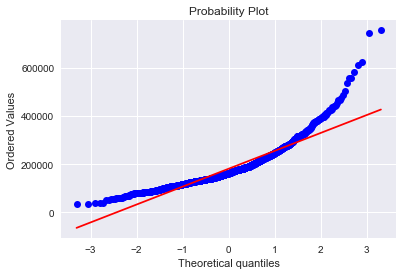

In [50]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

trying out log1p to see if i can undo it for the results 

In [51]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [52]:
#from sklearn import preprocessing
#from scipy.stats import boxcox

In [53]:
# correcting the skew and kurtosis on our SalePrice variable using BoxCox
#train['SalePrice'] = preprocessing.scale(boxcox(train['SalePrice']+1)[0])

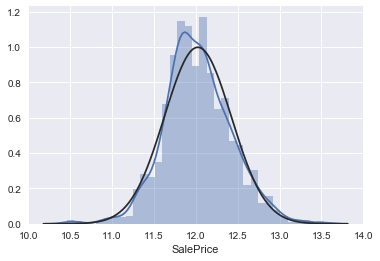

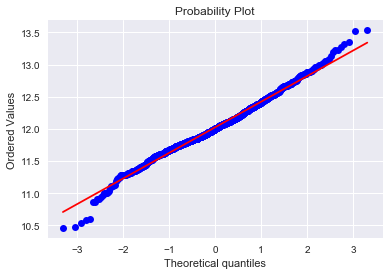

In [54]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [55]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (2917, 79)


# Dealing with Missingness

In [56]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(35)

,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageYrBlt,159,5.450806
GarageCond,159,5.450806


Missing Features:
    Alley: data desc says na means "no alley access"
    BsmtQual, BsmtCond, BsmntExposure, BsmtFinType1, BsmtFinType2: data desc says NA means "no basement"
    FireplaceQU: desc says NA means "No Fireplace"
    GarageType, GarageFinish,GaraGarageQual, GarageCond: desc says NA means "No Garage"
    PoolQC: desc says NA means "No Pool"
    Fence: desc says NA means "No Fence"
    MiscFeature: desc says NA means "None"

In [57]:
data["Alley"] = data["Alley"].fillna("None")
data["BsmtQual"] = data["BsmtQual"].fillna("None")
data["BsmtCond"] = data["BsmtCond"].fillna("None")
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")

In [58]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["GarageType"] = data["GarageType"].fillna("None")
data["GarageFinish"] = data["GarageFinish"].fillna("None")
data["GarageQual"] = data["GarageQual"].fillna("None")
data["GarageCond"] = data["GarageCond"].fillna("None")
data["PoolQC"] = data["PoolQC"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")

In [59]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(8)

,Total,Percent
LotFrontage,486,16.660953
GarageYrBlt,159,5.450806
MasVnrType,24,0.822763
MasVnrArea,23,0.788481
MSZoning,4,0.137127
Functional,2,0.068564
Utilities,2,0.068564
BsmtFullBath,2,0.068564


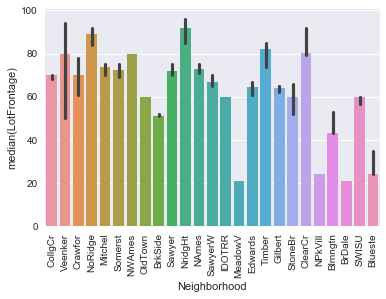

In [60]:
sns.barplot(data=data,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)
plt.show()
plt.gcf().clear()

neighborhood seems a pretty good at determining lot frontage- using the mean neighborhood lot frontage to impute the missing lot frontages

In [61]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [62]:
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)

most likely no basement so setting these basement measurements to zero

In [63]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

Probably no masonry veneer for these houses so setting to 0 or none

In [64]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

filling the 4 missing zoning's with residential- the most common seen zoning type

In [65]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

trying dropping utilities to see if this improves accuracy

In [66]:
data = data.drop(['Utilities'], axis=1)

filling missing functional with most common type (typ)

In [67]:
data['Functional'] = data['Functional'].fillna("Typ")

removing missing garage cars and area

In [68]:
data['GarageCars'] = data['GarageCars'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)

filling the remaining missing values by the most commonly seen value

In [69]:
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [70]:
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])

# Feature Engineering

transforming year and month into categorical features

In [71]:
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

gonna try putting overall condition as categorical

In [72]:
data['OverallCond'] = data['OverallCond'].astype(str)

MSSubClass should be categorical as well

In [73]:
data['MSSubClass'] = data['MSSubClass'].astype(str)

overall SF? we have TotalBsmtSF, 1stFlrSF and 2ndFlrSF
might be worth putting them together into a "overall SF"category?

In [74]:
data['OverallSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']

going to try combining categorical data with it's quality:
BsmtQual * BsmtCond
OverallQual * Neighborhood
Condition1 * Condition2
BldgType * OverallQual
ExterQual * ExterCond
KitchenQual * OverallQual
GarageType * GarageQual
GarageType * GarageCond
MoSold * YrSold
SaleType * SaleCondition
SaleType * OverallCond

Lasso score: 0.1122 (0.0134)
ElasticNet score: 0.1098 (0.0145)

In [75]:
data['BsmnQual_BsmtCond'] = data['BsmtQual'] + data['BsmtCond']
#data['OverallQual_Neighborhood'] = data['OverallQual'] + data['Neighborhood']
data['Condition1_Condition2'] = data['Condition1'] + data['Condition2']
#data['BldgType_OverallQual'] = data['BldgType'] + data['OverallQual']
data['ExterQual_ExterCond'] = data['ExterQual'] + data['ExterCond']
#data['KitchenQual_OverallQual'] = data['KitchenQual'] + data['OverallQual']
data['GarageType_GarageQual'] = data['GarageType'] + data['GarageQual']
data['GarageType_GarageCond'] = data['GarageType'] + data['GarageCond']
data['MoSold_YrSold'] = data['MoSold'] + data['YrSold']
data['SaleType_SaleCondition'] = data['SaleType'] + data['SaleCondition']
data['SaleType_OverallCond'] = data['SaleType'] + data['OverallCond']

# Figuring out what to do with Nominal & Ordinal Categories

According to the Data Documentation this is the breakdown on the Nominal and Ordinal Categories- 1st attempt I just used .get_dummies() on everything, but that gave:
Lasso score: 0.2779 (0.0385), which is, well, terrible so going to try and convert the ordinal categories. 
Right, so after this change i got Lasso score: 0.2790 (0.0380), which has lower standard deviation, but higher mean score. well crappers. running the changes to ordinal categories before adjusting for skew i got Lasso score: 0.2811 (0.0381) so that's worse again. hahahahaha. *cries*. not running the skew adjustment for any of the independent variables i got Lasso score: 0.2850 (0.0407). removing utilities gave me Lasso score: 0.2805 (0.0374). with adding some more nominals to the Label encoder i got Lasso score: 0.2900 (0.0219), which is less standard deviation which might be good?

Nomial categories

"MSSubClass", MSZoning, "Street", "Alley", LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1, Exterior2, MasVnrType, MasVnrArea, Foundation, Heating, "CentralAir", GarageType, MiscFeature, SaleType, SaleCondition

Ordinal Categories

LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

this time i'm going to try converting the ordinal categories with label encoding. It looks like it basically factorizes the values

one hot encoding for linear models
label encoder for trees

Categorical Features with many categories -  rows:category ratio 20:1 or less
use label count encoding

class LabelCountEncoder(object):
    def __init__(self):
        self.count_dict ={}
    
    def fit(self, column):
        count = column.value_counts().to_dict()
        self.count_dict = {key[0]: rank+1 for rank, key in enumerate(sorted(count.items(), key=lambda x:x[1]))}
    
    def trasnform(self,column):
        missing = 0
        return column.apply(lambda x: self.count_dict.get(x, missing))
    def fit_transform(self, column):
        self.fit(column)
        return self.trasnform(column)

In [76]:
from sklearn.preprocessing import LabelEncoder
category = ('LotShape', 'LandSlope', 'OverallCond', 'ExterQual', 'ExterCond', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
            'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'OverallCond', 
            'YrSold', 'MoSold', 'Street', 'Alley', 'CentralAir', 'MSSubClass')

for c in category:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values))

In [77]:
# data.groupby("LotShape").count()

gonna try rerunning the boxcox with these Label Encoded Values

# Skewness

In [78]:
# numerical = data.dtypes[data.dtypes != "object"].index

In [79]:
# skewed = data[numerical].apply(lambda x: x.skew()).sort_values()

allright, a lot of these are incredibly skewed- talking with YuHan it sounded like we'd be good to use boxcox on these 

In [80]:
# skewdf = pd.DataFrame({'Skew': skewed})
# skewdf.head(3)

In [81]:
# skewdf = skewdf[abs(skewdf)>0.75]
# from scipy.special import boxcox1p
# skewed = skewdf.index
# lam = 0.15
# for feat in skewed:
#     data[feat] = boxcox1p(data[feat], lam)

In [82]:
# newskewed = data[numerical].apply(lambda x: x.skew()).sort_values()

In [85]:
data = pd.get_dummies(data, drop_first = True, dummy_na=True)

In [86]:
data.shape

(2917, 438)

Re-separating the data into test and train

In [87]:
train = data[:ntrain]
test = data[ntrain:]

# Running the Models

In [88]:
# Load libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor as rfr,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [89]:
n_folds = 10
#this looks better, lets me use kfolds
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#def rmse(predictions, targets):
#    return np.sqrt(((predictions - targets) ** 2).mean())


In [1284]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00099, random_state=1))

In [1285]:
lasso

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [1286]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Lasso score: 0.1122 (0.0134)


switched away from boxcox to log1p and instantly improved by over 10%

In [90]:
### BEST PARAMETERS
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=1))

In [91]:
### BEST KAGGLE SCORE
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ElasticNet score: 0.1135 (0.0140)


In [61]:
# Cross Validating
# l_ratio = np.arange(0, 1, 0.1)
l_ratio = np.arange(0.75, 0.95, 0.01)
# alpha = np.arange(0, 0.001, 0.00005)
alpha = np.arange(0.00045, 0.00055, 0.00001)

In [62]:
results = pd.DataFrame({"Alpha":[], "L1":[], "Score":[]})
for i in l_ratio:
    for j in alpha:
        ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=j, l1_ratio=i, random_state=1))
        score = rmsle_cv(ENet).mean()
        results = results.append({"Alpha": j, "L1": i, "Score":score}, ignore_index=True)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

In [46]:
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
212,0.00048,0.94,0.111096


In [63]:
# .get_dummies(drop_first = True)
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
212,0.00048,0.94,0.111096


In [92]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00048, l1_ratio=.94, random_state=1))
ENet.fit(train.values, y_train)
pred = np.expm1(ENet.predict(test))
pred

array([ 115016.85557517,  152924.98993755,  178803.32330798, ...,
        170495.07756959,  115648.10610588,  227409.95242652])

In [51]:
pd.DataFrame(pred).to_csv('predictions5.csv', index = False)

In [93]:
x = list(zip(train.columns, ENet.steps[1][1].coef_))
x.sort(key = lambda x: x[1])
df = pd.DataFrame(x, columns=['Var', 'Coeff'])

top_pos = df["Coeff"][-20:]
top_neg = df["Coeff"][:20]
top_pos_names = df["Var"][-20:]
top_neg_names = df["Var"][:20]

top_coefs = np.hstack([top_neg, top_pos])
top_names = np.hstack([top_neg_names, top_pos_names])

([<matplotlib.axis.XTick at 0x1a1b7ceb70>,
 <a list of 40 Text xticklabel objects>)

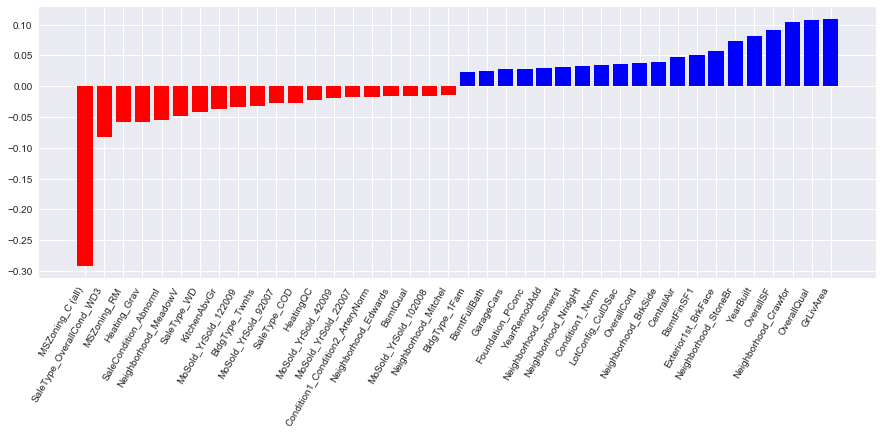

In [53]:
plt.figure(figsize = (15, 5))
colors = ['red' if c < 0 else 'blue' for c in top_coefs]
plt.bar(np.arange(40), top_coefs, color = colors)
feature_names = np.array(train.columns)
plt.xticks(np.arange(40), top_names, rotation = 60, ha = 'right')

In [66]:
betas = top_neg.append(top_pos)
col_names = top_neg_names.append(top_pos_names)
top40_coeffs = pd.concat([col_names, betas], axis=1)
top40_coeffs.to_csv("top40_coeffs_best_model.csv", index = False)

ok so my scores are terrible, i'm probably going to need to go back and mess with the data classifications

In [1309]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [1310]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1135 (0.0154)



In [1315]:
LGBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=2, max_features='sqrt',
                                    min_samples_leaf=15, min_samples_split=10,
                                    loss='huber', random_state =5)

In [1316]:
score = rmsle_cv(LGBoost)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1137 (0.0146)



In [1330]:
rfr = rfr(random_state=0,
        n_estimators=1000, max_depth=6,  max_features='sqrt')

In [1320]:
score = rmsle_cv(rfr)
print("rfr score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

rfr score: 0.1676 (0.0154)



In [1295]:
lasso.fit(train.values, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [1296]:
final = lasso.predict(test)

In [1297]:
final

array([ 11.67981144,  11.92951767,  12.128261  , ...,  12.08454216,
        11.68065902,  12.34616607])

In [1298]:
results = np.expm1(lasso.predict(test))

In [1299]:
results

array([ 118160.9524735 ,  151677.38491008,  185026.73348107, ...,
        177111.81059211,  118261.14615152,  230075.25463554])

In [1300]:
attempt2 = pd.DataFrame()
attempt1['Id'] = test_ID
attempt1['SalePrice'] = results
attempt1.to_csv('submit2.csv', index=False)